In [4]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

In [5]:
zones = gpd.read_file("Desktop/python/tl_2011_36_taz10.shp")

In [6]:
zones.head()

,STATEFP10,COUNTYFP10,MPOCE10,TADCE10,TAZCE10,GEOID10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,36,077,36000000,00000035,00590202,3607700590202,G6320,S,139574434,13368729,+42.7593572,-074.9632456,"POLYGON ((-75.024045 42.754126, -75.01915 42.7..."
1,36,077,36000000,00000035,00590300,3607700590300,G6320,S,239406885,5730677,+42.8258672,-075.1068763,"POLYGON ((-75.244421 42.875085, -75.244457 42...."
2,36,077,36000000,00000035,00590400,3607700590400,G6320,S,444258440,1614565,+42.6718225,-075.1909438,"POLYGON ((-75.06633099999999 42.591812, -75.06..."
3,36,077,36000000,00000036,00591500,3607700591500,G6320,S,240599956,430366,+42.5002338,-075.2983698,"POLYGON ((-75.39650499999999 42.491529, -75.39..."
4,36,077,36000000,00000039,00590700,3607700590700,G6320,S,256708856,771762,+42.5632159,-074.7870347,"POLYGON ((-74.693719 42.637015, -74.691255 42...."


In [7]:
zones.tail()

,STATEFP10,COUNTYFP10,MPOCE10,TADCE10,TAZCE10,GEOID10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
7904,36,091,36197300,00000146,0000440A,360910000440A,G6320,S,1156940,0,+42.8608347,-073.8024910,"POLYGON ((-73.794336 42.856192, -73.7943279999..."
7905,36,091,36197300,00000139,0000488A,360910000488A,G6320,S,12702279,10935,+43.1742677,-073.6888523,"POLYGON ((-73.69883 43.154055, -73.699595 43.1..."
7906,36,091,36197300,00000139,0000492B,360910000492B,G6320,S,7232730,0,+43.2737231,-073.6306682,"POLYGON ((-73.641921 43.262818, -73.644914 43...."
7907,36,091,36197300,00000139,0000492D,360910000492D,G6320,S,444958,0,+43.2773748,-073.6531829,"POLYGON ((-73.65789599999999 43.28106, -73.657..."
7908,36,091,36197300,00000140,00000484,3609100000484,G6320,S,1178548,138367,+43.1007502,-073.5805555,"POLYGON ((-73.58700499999999 43.102243, -73.58..."


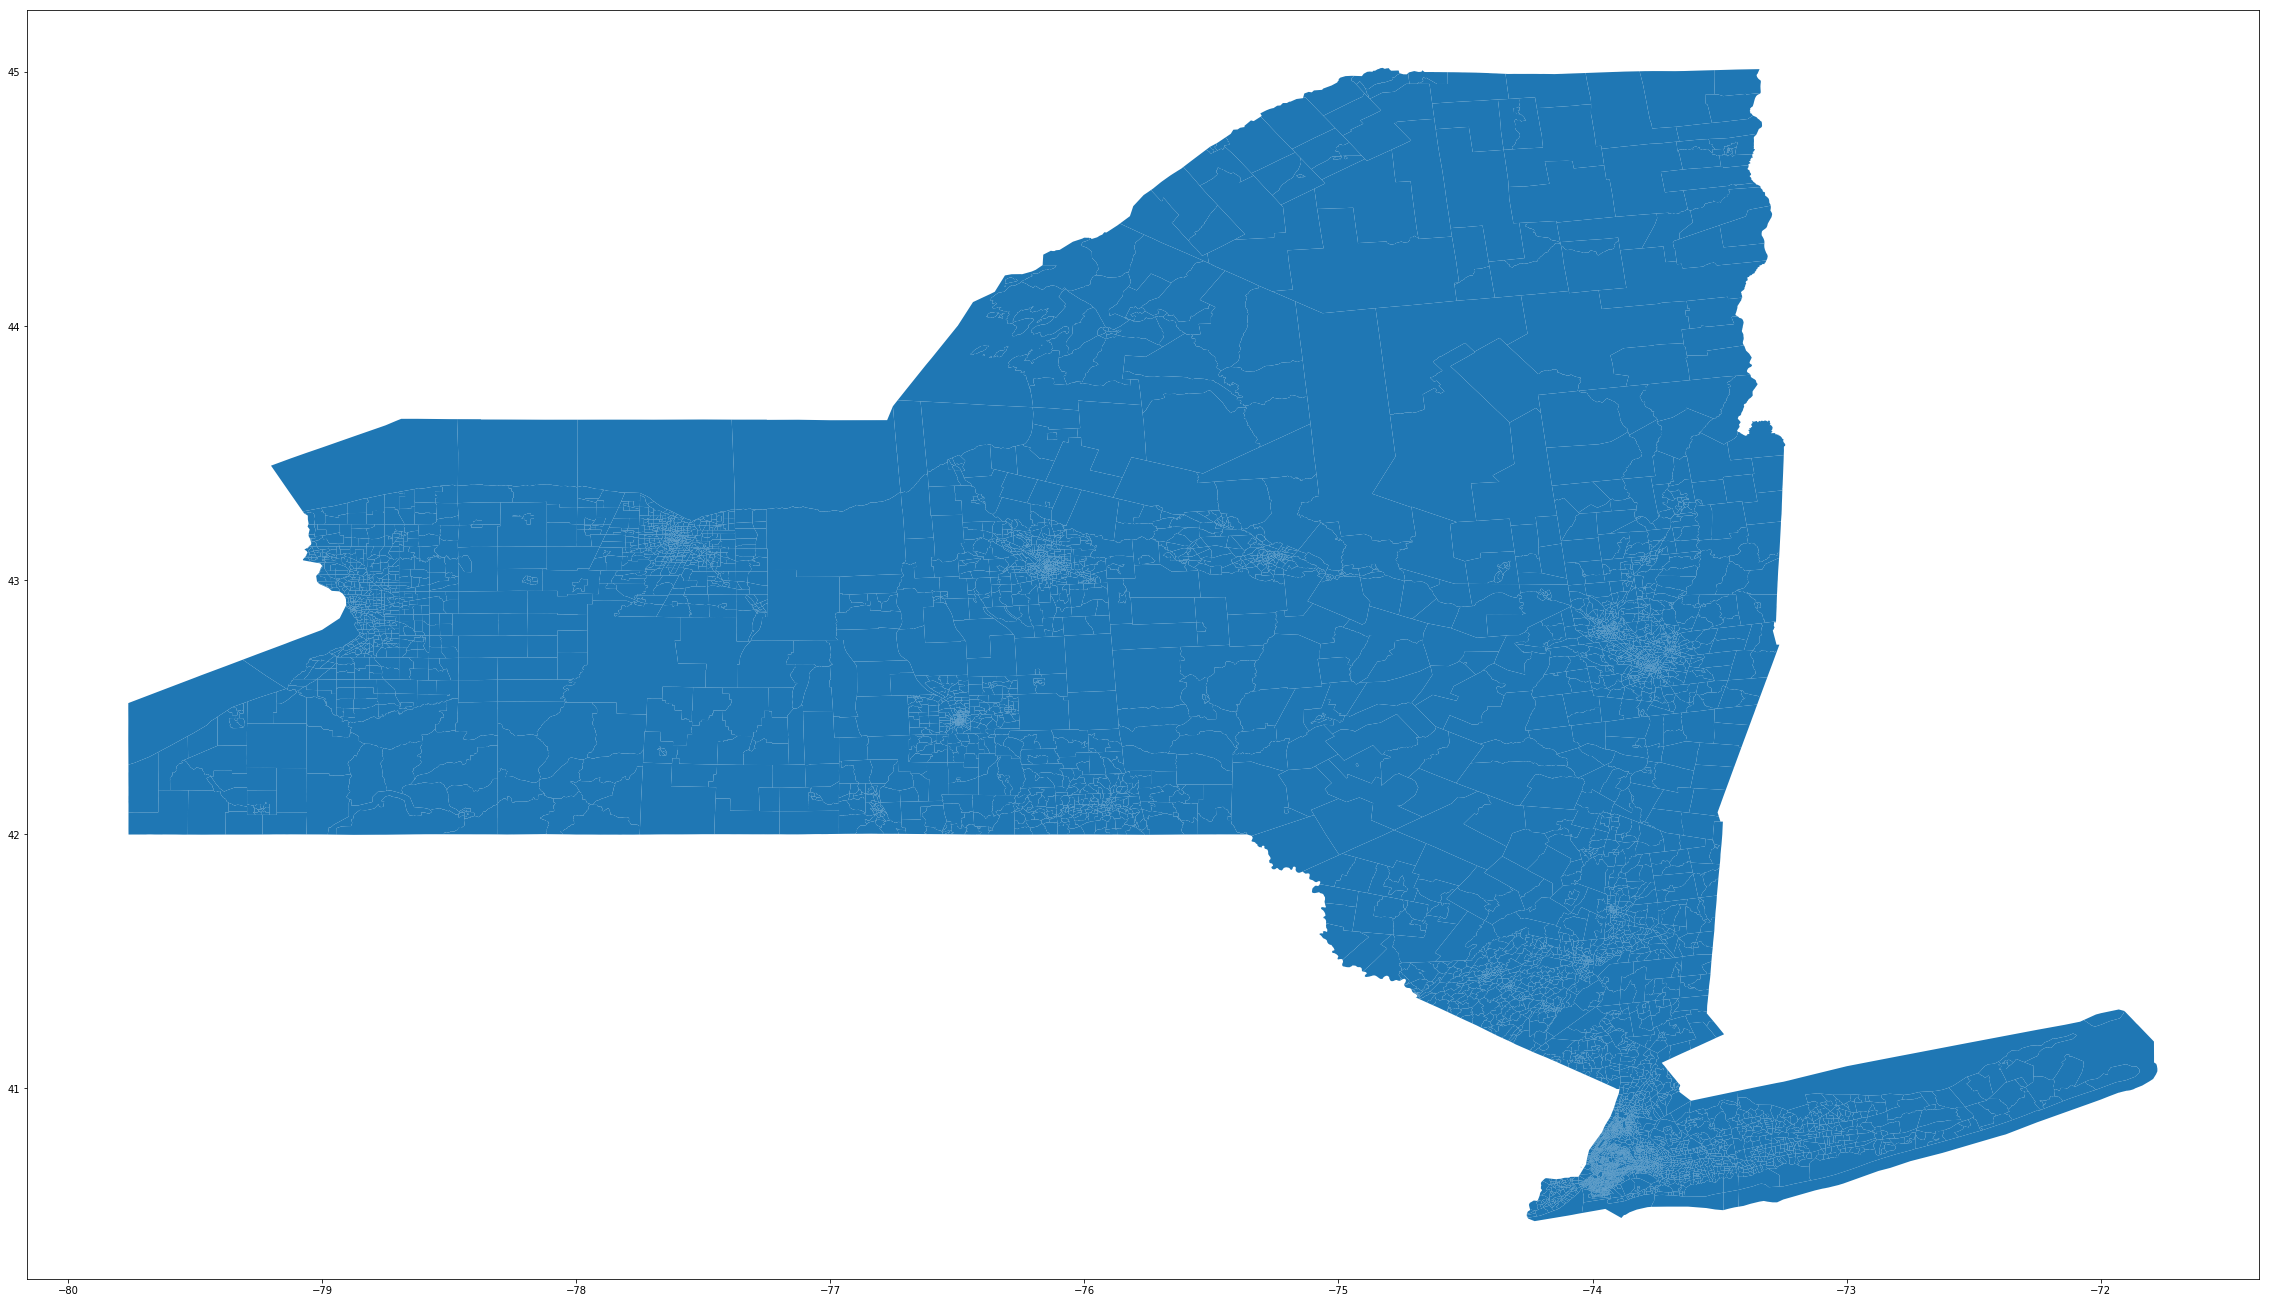

In [18]:
zones.plot(figsize=(40,40))

In [8]:
df = pd.read_csv("Desktop/final uber data.csv")
df.head(2)

,Unnamed: 0,Date/Time,Lat,Lon,Base
0,0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,1,4/1/2014 0:17:00,40.7267,-74.0345,B02512


In [9]:
def make_point(row):
    return Point(row.Lon, row.Lat)

In [10]:
# Go through every row, and make a point out of its lat and lon
points = df.apply (make_point, axis=1)

In [11]:
# Make a new GeoDataFrame
# using the data from our old df
# but also adding in the geometry we just made
pickups = gpd.GeoDataFrame(df, geometry=points)

In [12]:
# It doesn't come with a CRS because it's a CSV, so let's
# say "hey, let's use the standard shape of the earth etc"
pickups.crs = {'init': 'epsg:4326'}

In [13]:
# Let's look at the first few
pickups.head()

,Unnamed: 0,Date/Time,Lat,Lon,Base,geometry
0,0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,POINT (-73.95489999999999 40.769)
1,1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,POINT (-74.03449999999999 40.7267)
2,2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,POINT (-73.9873 40.7316)
3,3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,POINT (-73.9776 40.7588)
4,4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,POINT (-73.9722 40.7594)


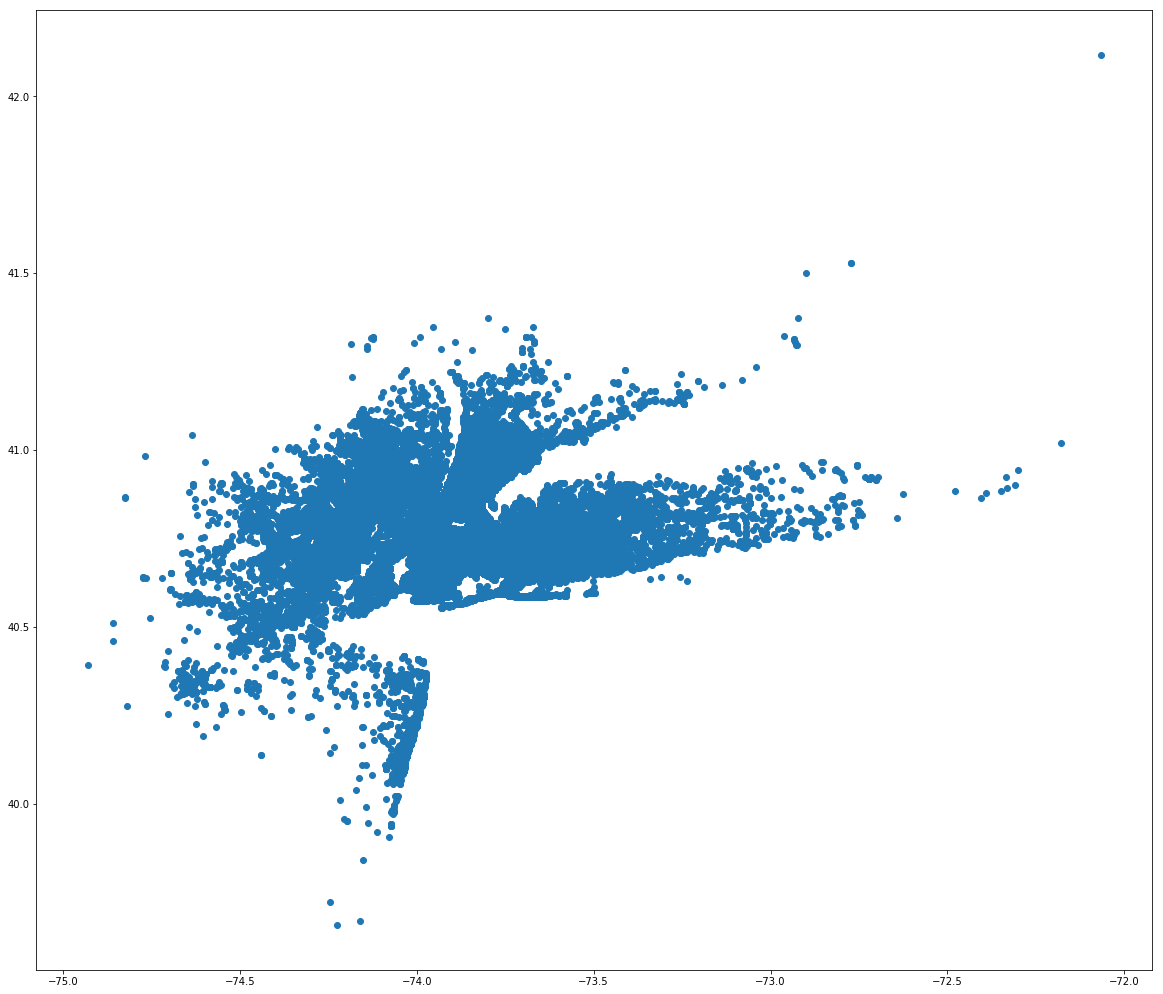

In [30]:
pickups.plot(figsize=(20,20))


In [ ]:
#Spatial Join

In [14]:
#Data Set1: NYC Traffic Analysis Zone (TAZ)
#Read the shape file
zones = gpd.read_file("Desktop/python/tl_2011_36_taz10.shp")

In [15]:
zones.tail()
##over here we can delete any zone or anything we want to get rid of but for now we are not doing that.

,STATEFP10,COUNTYFP10,MPOCE10,TADCE10,TAZCE10,GEOID10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
7904,36,091,36197300,00000146,0000440A,360910000440A,G6320,S,1156940,0,+42.8608347,-073.8024910,"POLYGON ((-73.794336 42.856192, -73.7943279999..."
7905,36,091,36197300,00000139,0000488A,360910000488A,G6320,S,12702279,10935,+43.1742677,-073.6888523,"POLYGON ((-73.69883 43.154055, -73.699595 43.1..."
7906,36,091,36197300,00000139,0000492B,360910000492B,G6320,S,7232730,0,+43.2737231,-073.6306682,"POLYGON ((-73.641921 43.262818, -73.644914 43...."
7907,36,091,36197300,00000139,0000492D,360910000492D,G6320,S,444958,0,+43.2773748,-073.6531829,"POLYGON ((-73.65789599999999 43.28106, -73.657..."
7908,36,091,36197300,00000140,00000484,3609100000484,G6320,S,1178548,138367,+43.1007502,-073.5805555,"POLYGON ((-73.58700499999999 43.102243, -73.58..."


In [16]:
#Dataset2 : UBER NYC data
## Read in finaluberdata.csv and convert it to GEO data frame as we did above
# Read in the CSV
df = pd.read_csv('Desktop/final uber data.csv')

points = df.apply(lambda row: Point(row.Lon,row.Lat), axis=1)
pickups = gpd.GeoDataFrame(df, geometry=points)
pickups.crs = {'init': 'epsg:4326'}

# If you want to know how this all works, look above
pickups.head(3)

,Unnamed: 0,Date/Time,Lat,Lon,Base,geometry
0,0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,POINT (-73.95489999999999 40.769)
1,1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,POINT (-74.03449999999999 40.7267)
2,2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,POINT (-73.9873 40.7316)


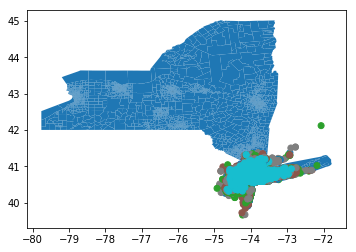

In [17]:
ax = zones.plot()
pickups.plot(column='Base', ax=ax)

In [18]:
zones.crs

{'init': 'epsg:4269'}

In [19]:
pickups.crs

{'init': 'epsg:4326'}

In [20]:
#Since CRS are not same we'll have to force them to match using .to_crs
#Convert CRS to match
converted_zones = zones.to_crs(pickups.crs)
converted_zones.head()

,STATEFP10,COUNTYFP10,MPOCE10,TADCE10,TAZCE10,GEOID10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,36,077,36000000,00000035,00590202,3607700590202,G6320,S,139574434,13368729,+42.7593572,-074.9632456,"POLYGON ((-75.024045 42.754126, -75.01915 42.7..."
1,36,077,36000000,00000035,00590300,3607700590300,G6320,S,239406885,5730677,+42.8258672,-075.1068763,"POLYGON ((-75.244421 42.875085, -75.2444570000..."
2,36,077,36000000,00000035,00590400,3607700590400,G6320,S,444258440,1614565,+42.6718225,-075.1909438,"POLYGON ((-75.06633099999999 42.591812, -75.06..."
3,36,077,36000000,00000036,00591500,3607700591500,G6320,S,240599956,430366,+42.5002338,-075.2983698,"POLYGON ((-75.39650499999999 42.491529, -75.39..."
4,36,077,36000000,00000039,00590700,3607700590700,G6320,S,256708856,771762,+42.5632159,-074.7870347,"POLYGON ((-74.693719 42.637015, -74.691255 42...."


In [21]:
converted_zones.head(15)

,STATEFP10,COUNTYFP10,MPOCE10,TADCE10,TAZCE10,GEOID10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,36,077,36000000,00000035,00590202,3607700590202,G6320,S,139574434,13368729,+42.7593572,-074.9632456,"POLYGON ((-75.024045 42.754126, -75.01915 42.7..."
1,36,077,36000000,00000035,00590300,3607700590300,G6320,S,239406885,5730677,+42.8258672,-075.1068763,"POLYGON ((-75.244421 42.875085, -75.2444570000..."
2,36,077,36000000,00000035,00590400,3607700590400,G6320,S,444258440,1614565,+42.6718225,-075.1909438,"POLYGON ((-75.06633099999999 42.591812, -75.06..."
3,36,077,36000000,00000036,00591500,3607700591500,G6320,S,240599956,430366,+42.5002338,-075.2983698,"POLYGON ((-75.39650499999999 42.491529, -75.39..."
4,36,077,36000000,00000039,00590700,3607700590700,G6320,S,256708856,771762,+42.5632159,-074.7870347,"POLYGON ((-74.693719 42.637015, -74.691255 42...."
5,36,077,36000000,00000037,00590500,3607700590500,G6320,S,119443336,2667056,+42.5460909,-074.9791255,"POLYGON ((-74.9872 42.467366, -74.989483999999..."
6,36,077,36000000,00000035,00590100,3607700590100,G6320,S,379700571,7748270,+42.7644243,-074.8302753,POLYGON ((-74.69169599999999 42.84223799999999...
7,36,077,36000000,00000035,00590201,3607700590201,G6320,S,103811010,886565,+42.6434617,-075.0167707,"POLYGON ((-74.95696100000001 42.687867, -74.95..."
8,36,077,36000000,00000037,00590800,3607700590800,G6320,S,85239778,652587,+42.4251236,-075.0998773,"POLYGON ((-74.99492099999999 42.467526, -74.98..."
9,36,077,36000000,00000037,00590900,3607700590900,G6320,S,2841570,1408,+42.4567251,-075.0456479,"POLYGON ((-75.05034599999999 42.472899, -75.04..."


In [22]:
converted_zones.crs


{'init': 'epsg:4326'}

In [23]:
pickups.crs

{'init': 'epsg:4326'}

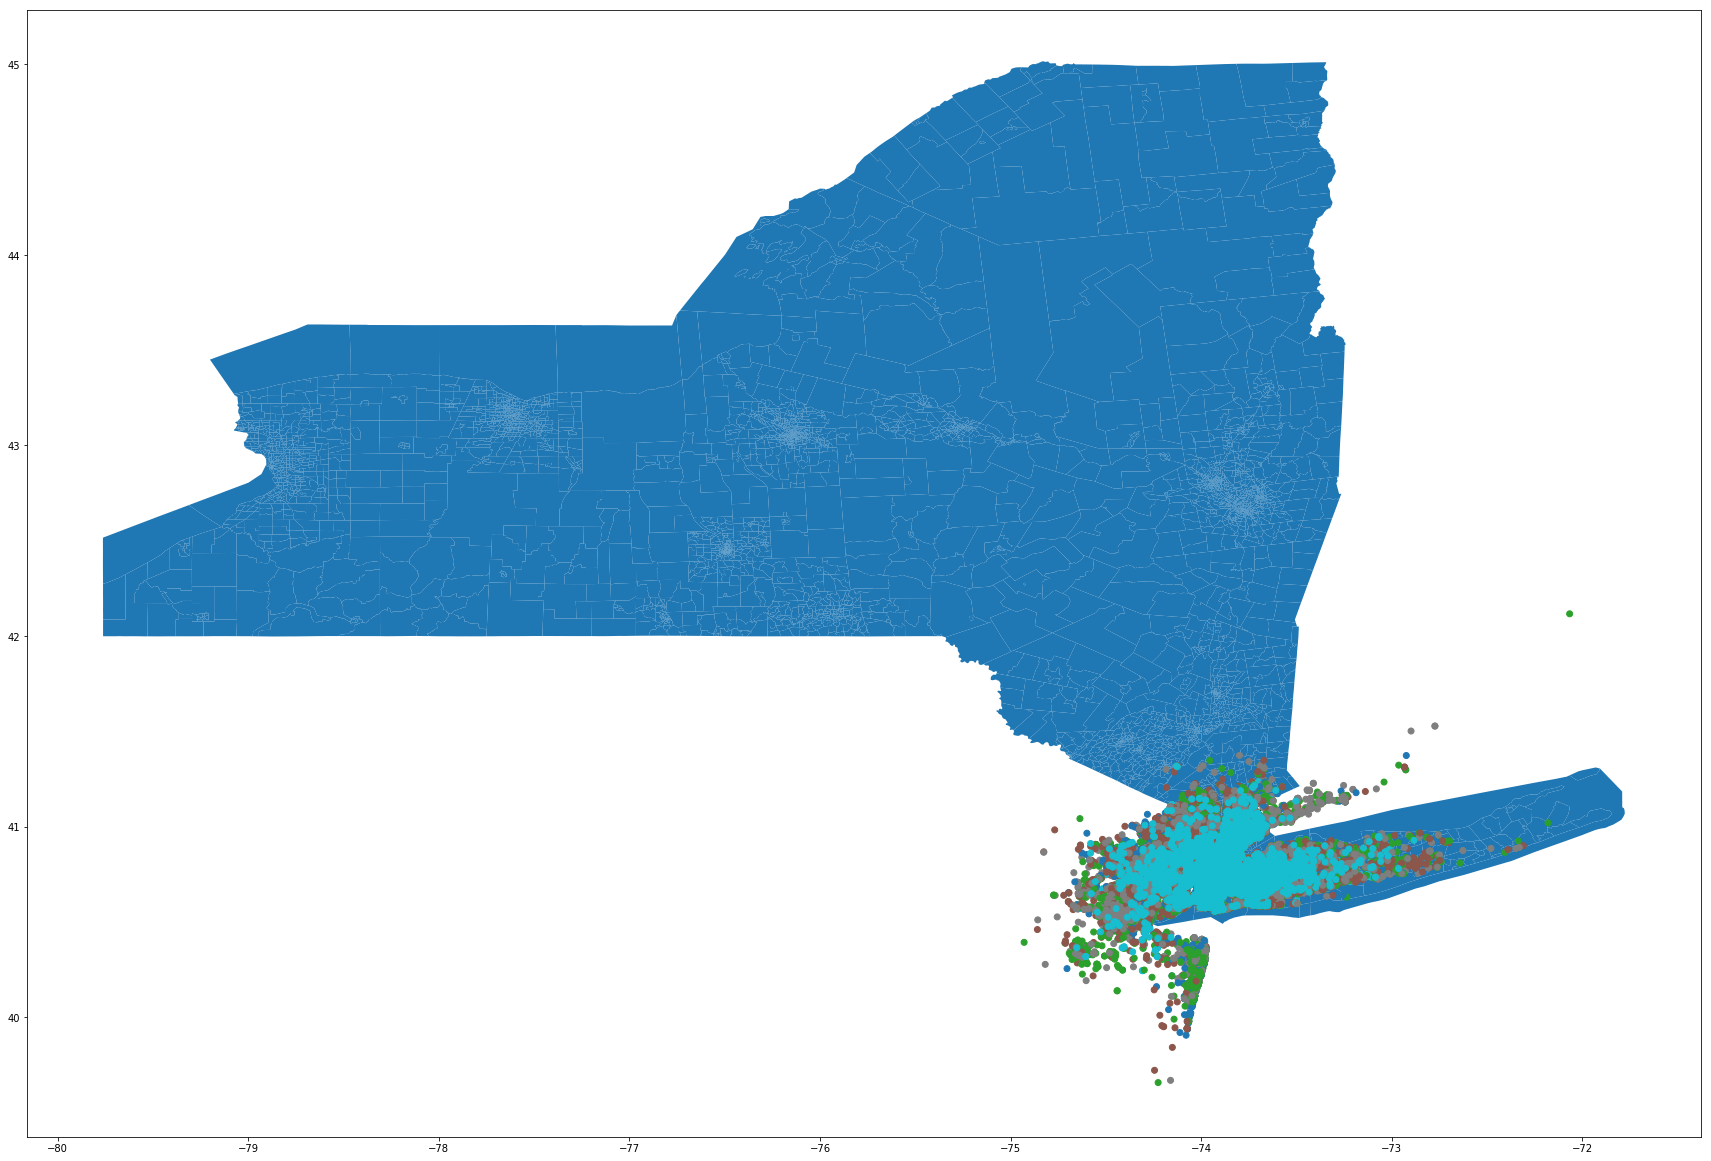

In [24]:
ax = converted_zones.plot(figsize=(30,30))
pickups.plot(column='Base', ax=ax)

In [25]:
pickups.head()


,Unnamed: 0,Date/Time,Lat,Lon,Base,geometry
0,0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,POINT (-73.95489999999999 40.769)
1,1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,POINT (-74.03449999999999 40.7267)
2,2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,POINT (-73.9873 40.7316)
3,3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,POINT (-73.9776 40.7588)
4,4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,POINT (-73.9722 40.7594)


In [26]:
converted_zones.head(5)

,STATEFP10,COUNTYFP10,MPOCE10,TADCE10,TAZCE10,GEOID10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,36,077,36000000,00000035,00590202,3607700590202,G6320,S,139574434,13368729,+42.7593572,-074.9632456,"POLYGON ((-75.024045 42.754126, -75.01915 42.7..."
1,36,077,36000000,00000035,00590300,3607700590300,G6320,S,239406885,5730677,+42.8258672,-075.1068763,"POLYGON ((-75.244421 42.875085, -75.2444570000..."
2,36,077,36000000,00000035,00590400,3607700590400,G6320,S,444258440,1614565,+42.6718225,-075.1909438,"POLYGON ((-75.06633099999999 42.591812, -75.06..."
3,36,077,36000000,00000036,00591500,3607700591500,G6320,S,240599956,430366,+42.5002338,-075.2983698,"POLYGON ((-75.39650499999999 42.491529, -75.39..."
4,36,077,36000000,00000039,00590700,3607700590700,G6320,S,256708856,771762,+42.5632159,-074.7870347,"POLYGON ((-74.693719 42.637015, -74.691255 42...."


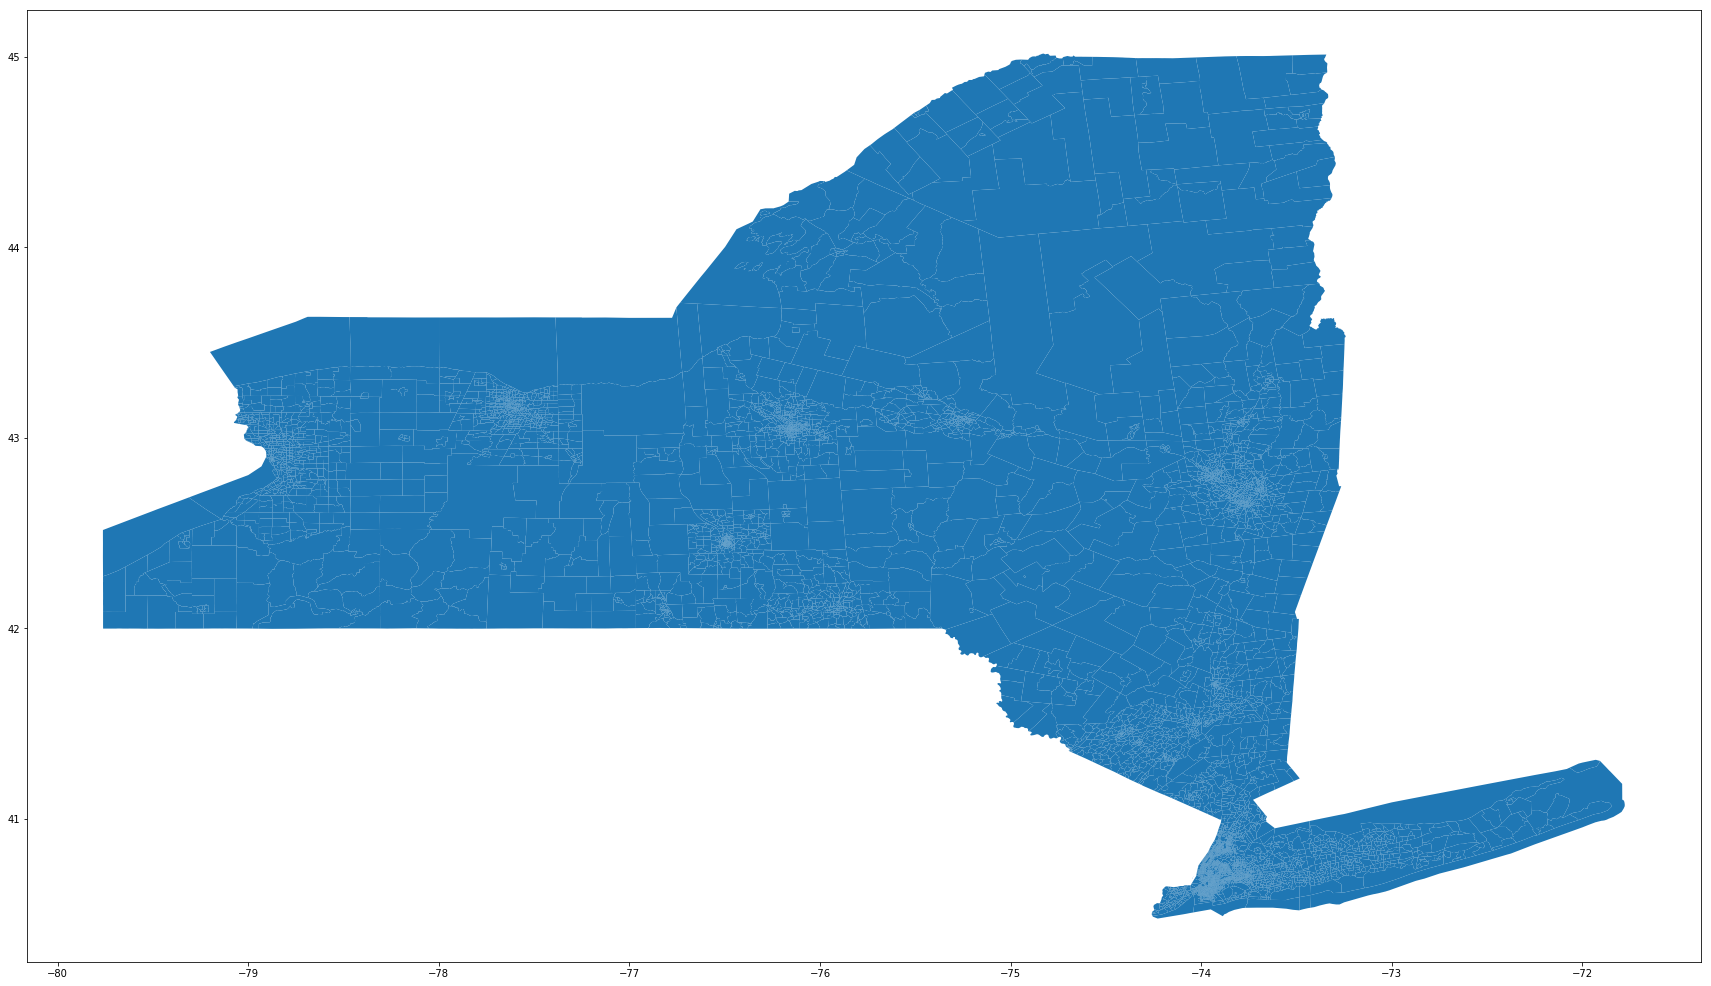

In [27]:
converted_zones.plot(figsize=(30,30))

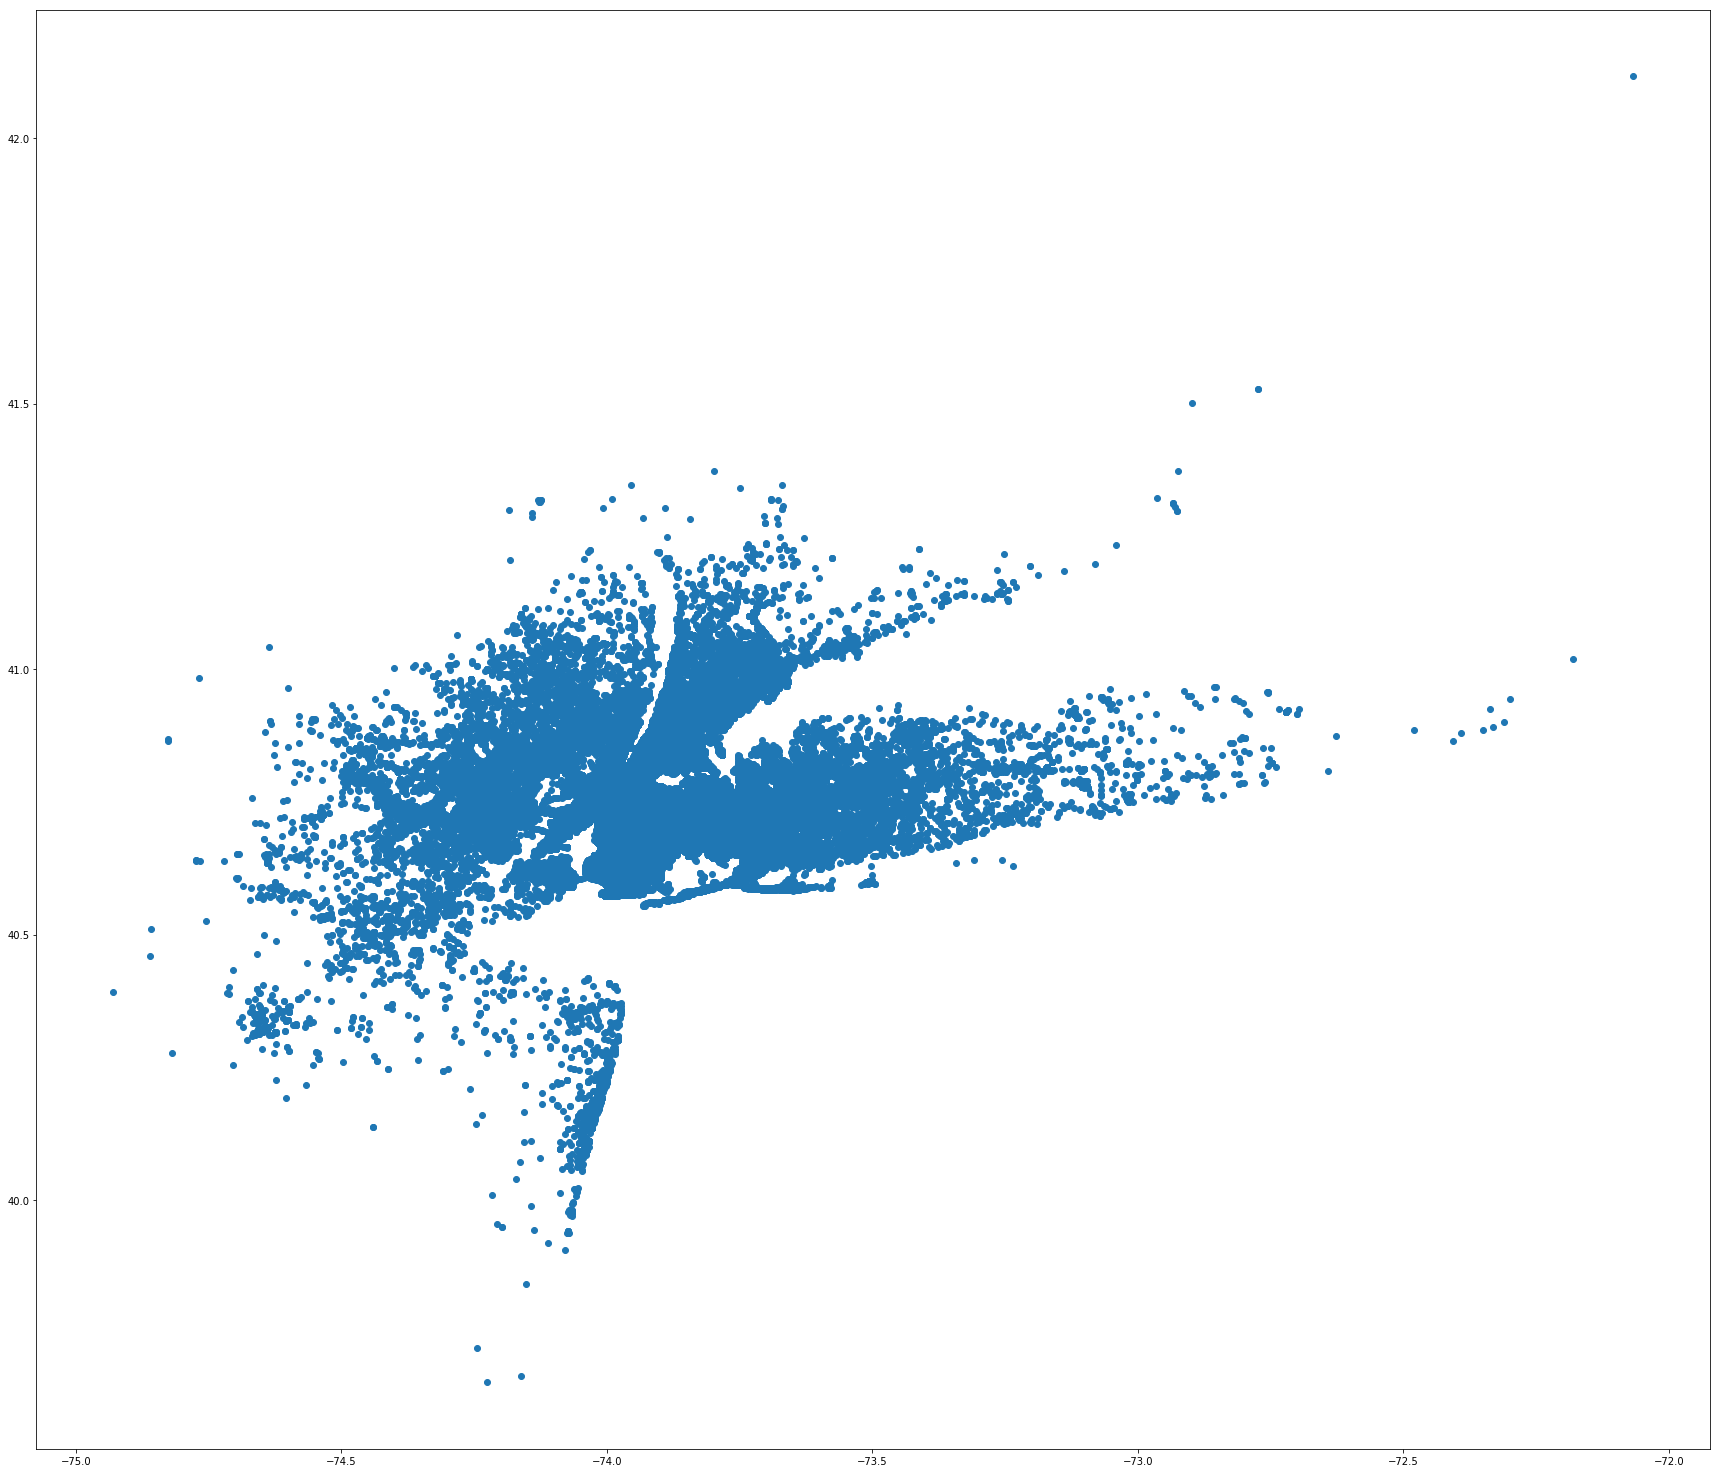

In [28]:
pickups.plot(figsize=(30,30))

In [29]:
pickups_with_zoningdata = gpd.sjoin(pickups,converted_zones, how='left', op='within')
pickups_with_zoningdata.head()

,Unnamed: 0,Date/Time,Lat,Lon,Base,geometry,index_right,STATEFP10,COUNTYFP10,MPOCE10,TADCE10,TAZCE10,GEOID10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10
0,0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,POINT (-73.95489999999999 40.769),2644.0,36,061,36198201,00001016,00012400,3606100012400,G6320,S,179281.0,58887.0,+40.7660368,-073.9528710
1,1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,POINT (-74.03449999999999 40.7267),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,POINT (-73.9873 40.7316),2498.0,36,061,36198201,00001005,00004000,3606100004000,G6320,S,178340.0,0.0,+40.7307448,-073.9860235
3,3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,POINT (-73.9776 40.7588),2549.0,36,061,36198201,00001010,00010400,3606100010400,G6320,S,173232.0,0.0,+40.7607791,-073.9776729
4,4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,POINT (-73.9722 40.7594),2521.0,36,061,36198201,00001011,00010000,3606100010000,G6320,S,172894.0,0.0,+40.7580653,-073.9712318


In [30]:
pickups_with_zoningdata.tail(10)

,Unnamed: 0,Date/Time,Lat,Lon,Base,geometry,index_right,STATEFP10,COUNTYFP10,MPOCE10,TADCE10,TAZCE10,GEOID10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10
4534317,1028126,9/30/2014 22:56:00,40.7371,-74.0289,B02764,POINT (-74.02889999999999 40.7371),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4534318,1028127,9/30/2014 22:56:00,40.6446,-73.7823,B02764,POINT (-73.78230000000001 40.6446),3113.0,36,081,36198201,00003025,00071600,3608100071600,G6320,S,18242599.0,1117802.0,+40.6460162,-073.7876652
4534319,1028128,9/30/2014 22:56:00,40.7163,-73.9623,B02764,POINT (-73.9623 40.7163),2087.0,36,047,36198201,00002002,00055500,3604700055500,G6320,S,261679.0,0.0,+40.7180847,-073.9632609
4534320,1028129,9/30/2014 22:57:00,40.6979,-73.9365,B02764,POINT (-73.9365 40.6979),1677.0,36,047,36198201,00002004,00038900,3604700038900,G6320,S,162908.0,0.0,+40.6994385,-073.9372346
4534321,1028130,9/30/2014 22:57:00,40.7300,-73.9565,B02764,POINT (-73.95650000000001 40.73),2057.0,36,047,36198201,00002001,00056500,3604700056500,G6320,S,251567.0,0.0,+40.7301815,-073.9579645
4534322,1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764,POINT (-73.9845 40.7668),2427.0,36,061,36198201,00001012,00013902,3606100013902,G6320,S,90763.0,0.0,+40.7666936,-073.9847494
4534323,1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764,POINT (-74.1773 40.6911),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4534324,1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764,POINT (-73.9319 40.8519),2476.0,36,061,36198201,00001026,00027100,3606100027100,G6320,S,192555.0,0.0,+40.8519392,-073.9342905
4534325,1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764,POINT (-74.00660000000001 40.7081),2590.0,36,061,36198201,00001001,00001502,3606100001502,G6320,S,176369.0,152457.0,+40.7056794,-074.0039235
4534326,1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764,POINT (-73.9496 40.714),2095.0,36,047,36198201,00002002,00051300,3604700051300,G6320,S,259327.0,0.0,+40.7117883,-073.9521808


In [31]:
pickups_with_zoningdata['TAZCE10'].value_counts()

00071600    105085
00033100     93773
00009900     79983
00007900     62000
00004900     51137
00010100     45886
00003900     45487
00005800     45425
00010000     44995
00008300     44192
00004300     42186
00004700     41737
00010400     39349
00011300     37242
00005200     36164
00007400     35423
00008400     35023
00003302     34610
00006500     34386
00003702     34118
00007300     33598
00004500     33565
00005600     33452
00005400     33005
00013702     32696
00007700     32113
00008200     31592
00010202     31566
00006700     29612
00031703     29268
             ...  
00158102         1
00134903         1
00158001         1
00017009         1
00158308         1
00134702         1
00123001         1
00027705         1
00014907         1
00146615         1
00158306         1
00201001         1
00017012         1
00123002         1
00158205         1
00147803         1
00158506         1
00158704         1
00158403         1
00158709         1
00013204         1
00158804    

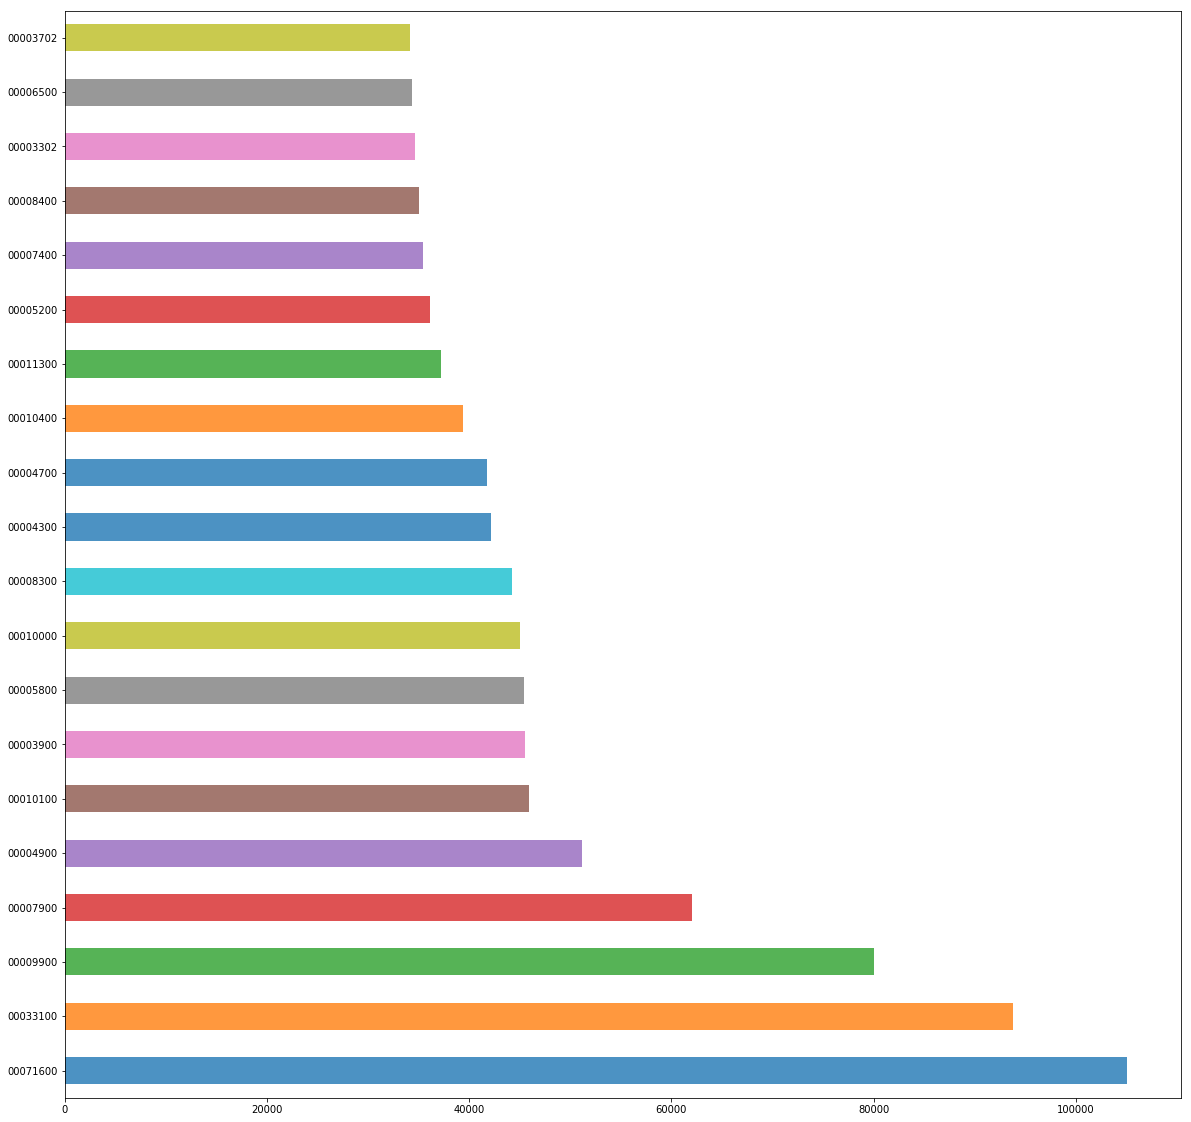

In [65]:

pickups_with_zoningdata['TAZCE10'].value_counts()[:20].plot(kind='barh', alpha=.8,figsize=(20,20))
